C:\Users\lcooper7\AppData\Local\Temp/ipykernel_8484/2118269877.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


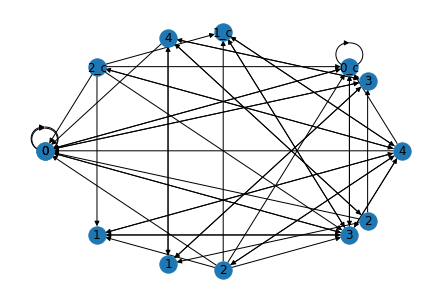

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
fig=plt.figure()
vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
nx.draw_shell(G,with_labels=True)

duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes_fast(G,duplicationGenes)
nx.draw_shell(G_dup,with_labels=True)
fig.show()

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=0.5
delta=0.5
flucLow=0.49
flucHigh=0.51


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.9:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.1:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.1:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.1:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.9:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.9:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

min 115 0.24999999999999978 0.7500000000000002 0.23999999999999977 0.5000000000000007
min 167 0.2599999999999998 0.7600000000000002 0.17999999999999972 0.49019607843137336
min 77 0.2599999999999998 0.7800000000000002 0.3599999999999999 0.5000000000000002
min 311 0.2599999999999998 0.7800000000000002 0.09999999999999969 0.5000000000000013


KeyboardInterrupt: 

In [ ]:

PA=[3,6,7]
PB=[5,8,3,7]
gf.NF_permlist(PA,PB)


[[5, 8, 3],
 [5, 3, 8],
 [8, 5, 3],
 [8, 3, 5],
 [3, 5, 8],
 [3, 8, 5],
 [5, 8, 7],
 [5, 7, 8],
 [8, 5, 7],
 [8, 7, 5],
 [7, 5, 8],
 [7, 8, 5],
 [5, 3, 7],
 [5, 7, 3],
 [3, 5, 7],
 [3, 7, 5],
 [7, 5, 3],
 [7, 3, 5],
 [8, 3, 7],
 [8, 7, 3],
 [3, 8, 7],
 [3, 7, 8],
 [7, 8, 3],
 [7, 3, 8]]

a
a
a


KeyboardInterrupt: 

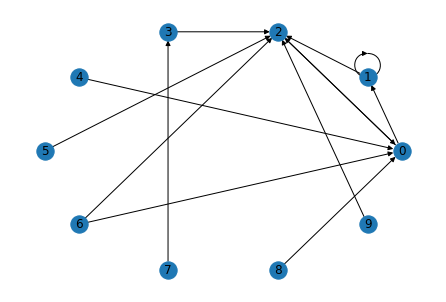

In [4]:
G1=nx.DiGraph(nx.scale_free_graph(10))
G2=nx.DiGraph(nx.scale_free_graph(30))
nx.draw_circular(G1,with_labels=True)
alignVec=gf.NF(G1,G2,32,0.8)
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
print(alignVec)
print(G1.edges)
print(G2.edges)


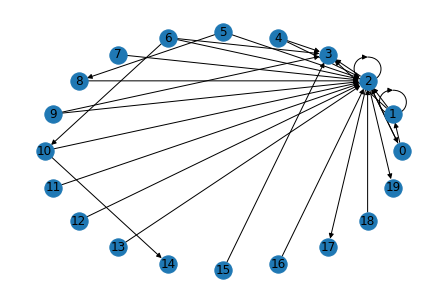

In [ ]:
pos=nx.circular_layout(G2)
nx.draw(G2,with_labels=True,pos=pos)

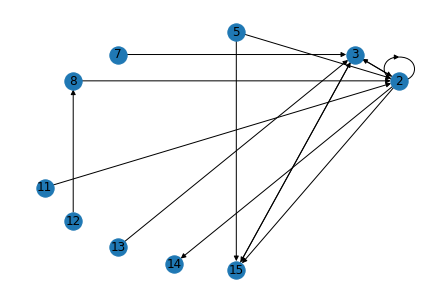

In [ ]:
nx.draw(G1,with_labels=True,pos=pos)

In [ ]:
sourceEdges= len(list(G1.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))

14
6
EC: 0.42857142857142855
ICS: 0.6
S3: 0.3333333333333333


In [55]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

damn
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


2.0